# XGBoost, LightBGBM
- 모듈을 먼저 설치해야 함
- 코랩에서 실행

## 유방암 데이터


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
X_train, X_test, y_train, y_test=train_test_split(X, y)
X_train.shape , X_test.shape

((426, 30), (143, 30))

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('컨퓨전 매트릭스')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f},\
    AUC:{4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))

## XGBoost
- 사이킷런 래퍼 방식 (사이킷런의 Estimator를 상속하여 만들었다)
- fit(), predict() 사용 가능
- XGBClassifier, XGBRegressor 제공
- 조기 종료 설정

In [5]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals, verbose=True)
y_pred = xgb_clf.predict(X_test)

[0]	validation_0-logloss:0.619017
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.558404
[2]	validation_0-logloss:0.509847
[3]	validation_0-logloss:0.466663
[4]	validation_0-logloss:0.431344
[5]	validation_0-logloss:0.401128
[6]	validation_0-logloss:0.376488
[7]	validation_0-logloss:0.354242
[8]	validation_0-logloss:0.333556
[9]	validation_0-logloss:0.318115
[10]	validation_0-logloss:0.302524
[11]	validation_0-logloss:0.28841
[12]	validation_0-logloss:0.276892
[13]	validation_0-logloss:0.266584
[14]	validation_0-logloss:0.257886
[15]	validation_0-logloss:0.251839
[16]	validation_0-logloss:0.243829
[17]	validation_0-logloss:0.240141
[18]	validation_0-logloss:0.23558
[19]	validation_0-logloss:0.230989
[20]	validation_0-logloss:0.228708
[21]	validation_0-logloss:0.224353
[22]	validation_0-logloss:0.221645
[23]	validation_0-logloss:0.221139
[24]	validation_0-logloss:0.220442
[25]	validation_0-logloss:0.218755
[26]	validation_0-logloss:0.217767

In [6]:
get_clf_eval(y_test, y_pred)

컨퓨전 매트릭스
[[46  9]
 [ 3 85]]
정확도: 0.916, 정밀도: 0.904, 재현율: 0.966, F1: 0.934,    AUC:0.901


## 특성 중요도 출력

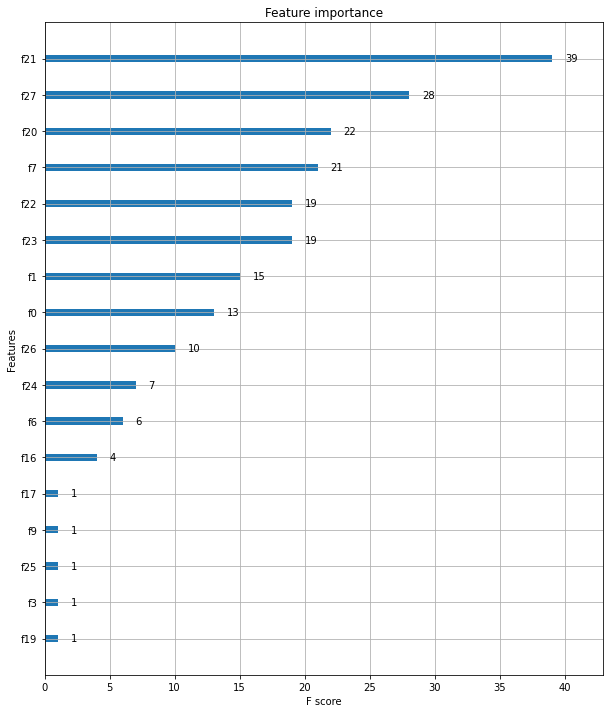

In [7]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)

## 랜덤 포레스트와 비교

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
get_clf_eval(y_test, y_pred_rfc)

컨퓨전 매트릭스
[[51  4]
 [ 2 86]]
정확도: 0.958, 정밀도: 0.956, 재현율: 0.977, F1: 0.966,    AUC:0.952


# LightGBM 
- LightGBM 설치

In [9]:
from lightgbm import LGBMClassifier

In [10]:
lgbm_clf = LGBMClassifier(n_estimators=200)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=10, 
                 eval_metric="logloss", eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.592626	valid_0's binary_logloss: 0.592626
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.536348	valid_0's binary_logloss: 0.536348
[3]	valid_0's binary_logloss: 0.48574	valid_0's binary_logloss: 0.48574
[4]	valid_0's binary_logloss: 0.450057	valid_0's binary_logloss: 0.450057
[5]	valid_0's binary_logloss: 0.415304	valid_0's binary_logloss: 0.415304
[6]	valid_0's binary_logloss: 0.387133	valid_0's binary_logloss: 0.387133
[7]	valid_0's binary_logloss: 0.362769	valid_0's binary_logloss: 0.362769
[8]	valid_0's binary_logloss: 0.337655	valid_0's binary_logloss: 0.337655
[9]	valid_0's binary_logloss: 0.318755	valid_0's binary_logloss: 0.318755
[10]	valid_0's binary_logloss: 0.301132	valid_0's binary_logloss: 0.301132
[11]	valid_0's binary_logloss: 0.28413	valid_0's binary_logloss: 0.28413
[12]	valid_0's binary_logloss: 0.273094	valid_0's binary_logloss: 0.273094
[13]	valid_0's binary_logloss: 0.260725	valid_0's b

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [11]:
y_pred_lgbm = lgbm_clf.predict(X_test)
get_clf_eval(y_test, y_pred_lgbm)
print('----------------')
print(classification_report(y_test, y_pred_lgbm))

컨퓨전 매트릭스
[[48  7]
 [ 3 85]]
정확도: 0.930, 정밀도: 0.924, 재현율: 0.966, F1: 0.944,    AUC:0.919
----------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        55
           1       0.92      0.97      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



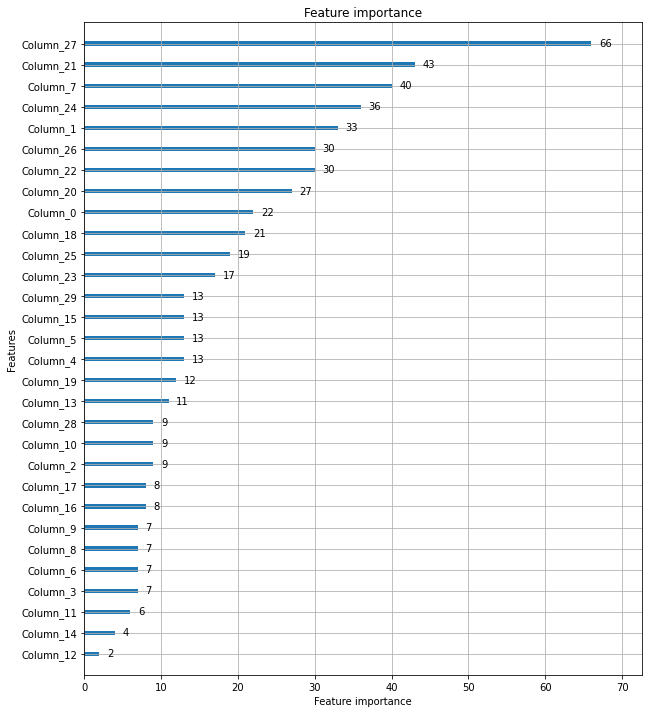

In [12]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)